In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob

import ipywidgets as widgets

In [2]:
imagesPath = glob.glob('./dota/*.jpg')

In [3]:
images = []
for path in imagesPath:
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))

In [4]:
@widgets.interact(idx=(0, len(images) - 1))
def showImage(idx):
    plt.figure(figsize=(15, 15))
    plt.imshow(images[idx], cmap='gray')
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=3, description='idx', max=7), Output()), _dom_classes=('widget-interact'…

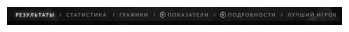

In [5]:
template = cv2.imread('template3.png', 0)
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
template.shape[::-1]

(1432, 76)

In [7]:
w, h = template.shape[::-1]

method = eval('cv2.TM_CCOEFF_NORMED')

In [97]:
@widgets.interact(idx=(0, len(images) - 1))
def showTemplate(idx):
    plt.figure(figsize=(15, 15))
    img = images[idx].copy()
    
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    time_top_left = (1010, 280)
    time_bottom_right = (top_left[0] + 700, top_left[1] + 120)
    cv2.rectangle(img, time_bottom_right, time_top_left, 255, 2)
    print(img.shape)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    print(time_bottom_right, time_top_left)

interactive(children=(IntSlider(value=3, description='idx', max=7), Output()), _dom_classes=('widget-interact'…

In [65]:
def clipImage(img, xy_start: tuple, xy_end: tuple):
    new_img = img.copy()
    return new_img[xy_start[0]:xy_start[1], xy_end[0]:xy_end[1]]

In [111]:
@widgets.interact(idx=(0, len(images) - 1))
def showCroppedImage(idx):
    print(images[idx].shape)
    plt.figure(figsize=(10, 10))
    
    new_img = images[idx].copy()[246:280, 911:1010]
    blurred = cv2.medianBlur(new_img,1)
    
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=3, description='idx', max=7), Output()), _dom_classes=('widget-interact'…

In [112]:
time_images = []
for img in images:
    new_img = img.copy()[246:280, 911:1010]
    blurred = cv2.medianBlur(new_img,1)
    time_images.append(blurred)

In [154]:
digitsPath = glob.glob('./nums/*.png')
digits = []
for path in digitsPath:
    digits.append(cv2.resize(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY), (34, 34)))

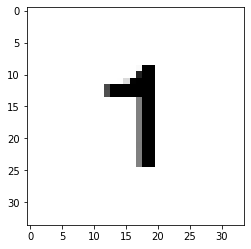

In [155]:
plt.imshow(digits[8], cmap='gray')

In [164]:
templ_shapes = []
w, h = (34, 34)

for i in range(len(digits)):
    templ_shapes.append(digits[i].shape[:: -1])

In [165]:
templ_shapes[0]

(34, 34)

In [167]:
@widgets.interact(idx=(0, len(images) - 1), threshold=(0, 1, 0.005))
def showTemplate(idx, threshold):
    img_gray = time_images[idx].copy()
    for template in digits: 
        res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
        cv2.rectangle(img_gray, pt, (pt[0] + w, pt[1] + h), (255,255,255))
    plt.imshow(img_gray, cmap='gray')

interactive(children=(IntSlider(value=3, description='idx', max=7), FloatSlider(value=0.0, description='thresh…